In [1]:
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/machine.data'

In [3]:
df = pd.read_csv(path, header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [5]:
df.columns = ['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

In [6]:
df.head()

,Vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [7]:
# 데이터 프레임의 행, 열 길이
print(df.shape)

# 데이터 프레임의 통계량
print(df.describe())

# 데이터 프레임의 일반 정보
print(df.info())

(209, 10)
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
7

In [8]:
# 인코딩할 열을 따로 분리하기 위해
categorical = [col for col in df.columns if df[col].dtype == 'O']

In [9]:
df[categorical[0]].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [10]:
df[categorical[0]].value_counts()

Vendor name
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

In [11]:
df[categorical[1]].unique()

array(['32/60', '470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b',
       '580-5840', '580-5850', '580-5860', '580-5880', 'dn320', 'dn420',
       '7/65', '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780'

In [13]:
# 인코딩 의미 x -> 정수 인코딩
print(len(df[categorical[1]].unique()))

209


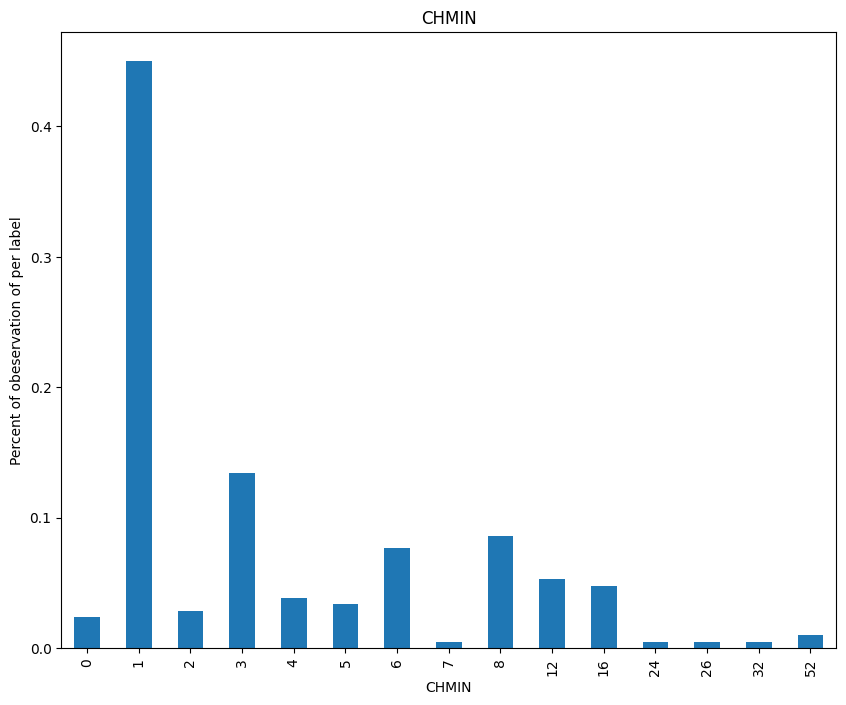

In [15]:
# 시각화

#1. 도화지 준비하기
plt.figure(figsize=(10, 8))

#데이터를 시각화 하는 줄
(df.groupby('CHMIN')['CHMIN'].count()/ len(df)).plot.bar()

plt.ylabel("Percent of obeservation of per label")
plt.title("CHMIN")
plt.show()

In [17]:
# categorical 로 된 열을 버림
# df.iloc[행, 열]
X = df.iloc[: ,  2:-1]

In [18]:
Y = df.iloc[: , -1]

In [19]:
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [20]:
Y

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
# 스케일 변화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-0.26155465, -0.22337018, -0.32833978, ..., -0.40730196,
        -0.14967061, -0.33146532],
       [ 0.48886971, -0.58556939, -0.86830946, ..., -0.56216156,
        -0.59315954, -0.2269826 ],
       [ 0.0270701 , -0.58556939, -0.32833978, ..., -0.56216156,
        -0.39157367, -0.27000489],
       ...,
       [-0.2038297 , -0.22337018, -0.68831957, ..., -0.25244236,
        -0.47220802, -0.47282429],
       [ 0.2194866 , -0.58556939, -0.68831957, ..., -0.09758276,
        -0.43189084, -0.3437574 ],
       [-0.65408431,  7.07903323,  4.71137722, ...,  4.238486  ,
         1.86618817,  6.38001276]])

In [24]:
# 모델링

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [25]:
y_predict = lr.predict(X_test)

In [26]:
print(f"기울기 : {lr.coef_}")
print(f"절편 : {lr.intercept_ }")

기울기 : [ 9.55048762 33.10771713 30.96306419  6.97690778  1.51389386  9.6977291
 87.34964224]
절편 : 99.02054794520548


In [27]:
from sklearn.metrics import r2_score

# 회귀선이 데이터의 분포를 얼마나 잘 나타내고 있는가를 계산하는 함수
# 0.7 보다 높다 -> 분포를 잘 표현하고 있다.
# 결정계수
print(f"R2 score : {r2_score(Y_test, y_predict)}")

R2 score : 0.9528001035360191
